# Quiz 4 - Harris Corner Detector
#### Edson Roteia Araujo Junior e João Pedro Moreira Ferreira

### Instructions
- Implement algorithm HARRIS’ detector (page 84 Trucco and Verri).
- For each fixed pair of values of the algorithm parameters, measure the robustness of your implementation with synthetic images of squares corrupted by increasing amounts of Gaussian noise, as follows:
    - record the Root Mean Square (RMS) distance of the estimated corners from the true positions
    - the number of spurious corners
    - the number of missed corners. 
- Plot these values in three graphs, against the standard deviation of the noise. Compare with cv2.cornerHarris from OpenCV (https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_feature2d/py_features_harris/py_features_harris.html).

In [26]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

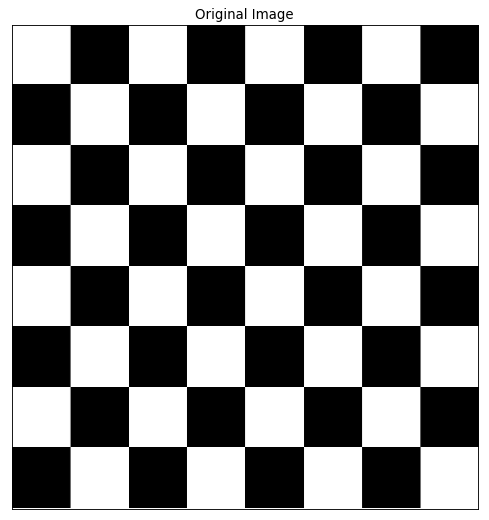

In [31]:
filename = 'imgs/chess.png'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
fig=plt.figure(figsize=(9, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(img)
plt.xticks([]),plt.yticks([])
plt.title('Original Image') 
plt.show()

### OpenCV implementation of Harris algorithm

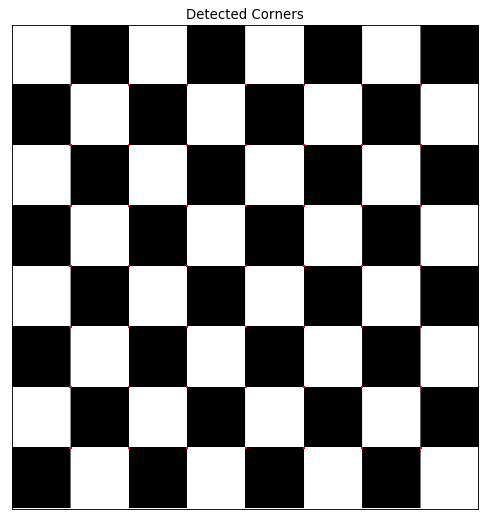

In [32]:
dst = cv2.cornerHarris(gray,2,3,0.04)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

imgcorners = img.copy()
# Threshold for an optimal value, it may vary depending on the image.
imgcorners[dst>0.01*dst.max()]=[0,0,255]
imgcorners = cv2.cvtColor(imgcorners, cv2.COLOR_BGR2RGB)

fig=plt.figure(figsize=(9, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(imgcorners)
plt.xticks([]),plt.yticks([])
plt.title('Detected Corners') 
plt.show()

### Creating Gaussian Noise

In [29]:
def applyGaussianNoise(img, sigma):
    row,col,ch = img.shape
    noise = np.random.normal(0,sigma,(row,col,ch))
    noise = noise.reshape(row,col,ch)
    img = img + noise
    return img

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


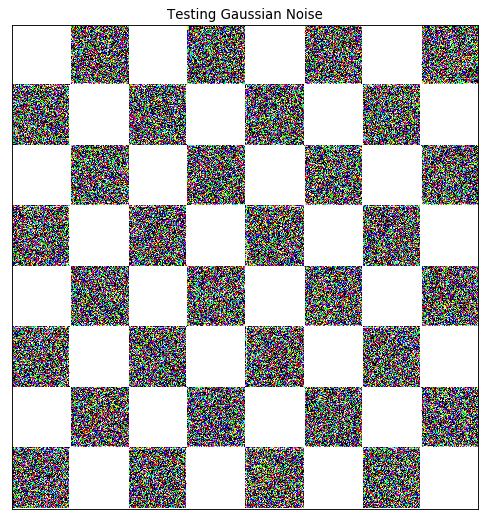

In [37]:
fig=plt.figure(figsize=(9, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(applyGaussianNoise(img, 1.5))
plt.xticks([]),plt.yticks([])
plt.title('Testing Gaussian Noise') 
plt.show()